# Ferromagnetismo 22/23

### Introdução

<li>Modelo de Heisenberg:<ul>
<li>Considera apenas a interacção entre electrões desemparelhados.</li>
<li>Para simplificação vamos considerar apenas um electrão por nó da rede cristalina.</li>
<li>Podemos considerar uma interacção de curto alcance devida apenas aos spins dos electrões.</li>

A energia de interacção entre dois electrões pode ser escrita como:

$$ 
E_\pm = I_0 \pm \frac{J}{2} 
$$

com + para spins anti-paralelos e - para spins paralelos. $I_0$ deve-se à interacção de Coulomb e $J/2$ é o chamado integral de troca e que se deve à interacção spin-spin.

A diferença de energias entre um estado de spins paralelos e um anti-paralelos é:
$$\Delta E = E_+ - E_- = J$$
Se J &gt; 0 então os estados paralelos têm menor energia, e tem-se ferromagnetismo, se J &lt; 0 os estados anti-paralelos têm menor energia e tem-se anti-ferromagnetismo.

## Modelo de Ising

Considerando o caso em que S = 1/2 a energia total vai ser dada por:

$$E = -\frac{1}{2} \sum_{i, j}{J_{i, j}\sigma_i\sigma_j} - \mu B \sum_{i}{\sigma_i}$$

com $\sigma_i = \pm 1$ e $\sigma_j = \pm 1$

Ou seja mesmo na ausência de campo externo o estado mínimo de energia correposnde a todos os spins alinhados e à produção de campo magnetico pelo próprio material.

Para efectuar a simulação segundo o modelo de Ising vamos produzir o seguinte programa:

<li>Incialização da rede.</li>
<li>Em cada ponto da rede<ol>
<li>Calcula-se a variação de energia no caso de inversão de spin</li>
<li>Se a variação de energia for negativa o spin é invertido.</li>
<li>Se a variação de energia for positiva atribui-se uma probablidade à inversão de spin (<em>função de transição, w</em>).</li>
<li>Produz-se um número aleatório, r. Se r &lt; w há inversão de spin.</li>
<li>Termina o ciclo de Monte Carlo.</li>
</ol>
</li>
<li>Calcula-se as grandezas físicas associadas à nova configuração da rede.</li>

## Função de transição

A variação de energia devido à inversão de um spin na componente spin-spin é dada por:

$$\Delta \epsilon = J\left(\sigma_{i inicial} \sum_j{\sigma_j} - \sigma_{i final}\sum_j{\sigma_j}\right) = J\left(\pm 2\sum_j{\sigma_j}\right) = 2 J \delta$$

com $\delta = \pm \sum_j{\sigma_j} = -4; -2; 0; 2; 4$

Nas situações em que $\Delta \epsilon < 0 \Longrightarrow w = 1$

Nas situações em que $\Delta\epsilon > 0 \Longrightarrow w = e^{-\frac{2\delta}{t}}$ em que t é a temperatura reduzida.

Quando se tem campo magnetico externo a função de transição fica:

$$w = \begin{cases}
1, \Delta\epsilon <; 0\\
e^{-\frac{\delta + \sigma_{i inicial}h}{t}}, \Delta\epsilon >; 0
\end{cases}$$

com h campo magnético reduzido.

Em vez de calcularmos a função de transição em cada ponto da rede produzimos a tabela de todos os valores possíveis da função de transição antes de iniciar os ciclos de Monte Carlo. Fazendo-se o mesmo procedimento para as indexações das posições vizinhas.

## Variáveis reduzidas

Vamos usar as variáveis reduzidas:

$$t = \frac{K T}{J}$$
$$h = \frac{\mu_B B}{J}$$

Queremos observar o comportamento da rede a diferentes temperaturas e campos externos aplicados para as grandezas:

- Momento magnético, m. Devido a trocas de sentido perto da temperatura crítica vamos considerar o modulo do momento magnético.

- Energia média por ponto de rede.

- Susceptibilidade magnética.

- Capacidade calorífica.

## Simulação

### Grandezas a analizar

<li>o momento magnético médio da rede e com o factor de ordem</li>

$$ m = \frac{||\overline{M}||}{L^2}$$

<li>energia média por ponto de rede</li>

$$ \overline{\epsilon} = \frac{\overline{E}}{L^2}$$

<li>susceptibilidade magnética</li>

$$ \chi = \frac{\sigma^2\left(M\right)}{t}L^2$$

<li>capacidade calorífica</li>

$$ C = \frac{\sigma^2\left(\epsilon\right)}{t^2L^2}$$

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ferroSimul(tamanho, n_iter, t, h):
    rede = 2 * np.random.randint(2, size=(tamanho, tamanho)) - 1
    
    def delta_energia(i, j):
        spin = rede[i, j]
        net_spin = (rede[i, (j - 1) % tamanho] + rede[i, (j + 1) % tamanho] +
                    rede[(i - 1) % tamanho, j] + rede[(i + 1) % tamanho, j])
        return 2 * spin * net_spin + 2 * h * spin

    ordem = []
    energia = []

    # Calcular e coletar dados ao longo de cada passo
    for step in range(n_iter):
        i, j = np.random.randint(tamanho), np.random.randint(tamanho)
        de = delta_energia(i, j)
        if de < 0 or np.random.rand() < np.exp(-de / t):
            rede[i, j] *= -1
        if step % 100 == 0:  # Coleta dados a cada 100 passos
            m = np.abs(rede.sum())
            order = m / tamanho**2
            e = -np.sum(rede * np.roll(rede, 1, axis=0) + rede * np.roll(rede, 1, axis=1)) / tamanho**2
            ordem.append(order)
            energia.append(e)

    return rede, ordem, energia

In [3]:
t = 5.5
h = 0.
tamanho = 10
rede, order, e = ferroSimul(tamanho, 10000, t, h)

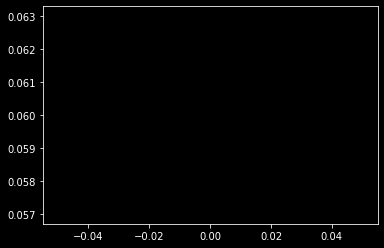

In [4]:
plt.plot(order)

In [ ]:
order[1000:].mean()

In [ ]:
np.abs(order[1000:]).mean()

In [ ]:
plt.plot(e)

In [ ]:
e[1000:].mean()

In [ ]:
sus = order.var() * tamanho ** 2 / t 
sus

In [ ]:
C = e.var() / (tamanho ** 2 * t ** 2)
C

In [ ]:
temps = np.arange(0.5, 5.5, .1)
m, sus, e, c = simulacao_temp(temps, 10, 1000, 0)
fig1 = ferro_graf(m, sus, e, c, temps)
fig1

In [ ]:
max_sus = sus.max()
temps[sus == max_sus]

In [ ]:
max_c = c.max()
temps[c == max_c]

In [ ]:
output = np.array([temps, m, sus, e, c]).transpose()

In [ ]:
np.savetxt('0.tsv', output, delimiter='\t')

In [ ]:
data = np.loadtxt('0.tsv', delimiter='\t')
data 

In [ ]:
fig1.savefig('ferro.svg', dpi=1200)

## Desenho da simulação

- Se variar a temperatura ou o campo devo começar com a rede inicializada sempre da mesma forma ou no novo valor de t ou h começar com a rede como terminou o valor anterior? Vantagens e desvantagens

- Que números de ciclos iniciais se devem não contabilizar para efeitos de obtenção de valores? 10%, valor fixo, outros?

- Tamanho da rede, fronteiras abertas ou fechadas?

- Que valores simular, com que passos?

- Temos dados experimentais para verificar parte ou toda a simulação?

- Qual o objectivo da simulação?

# EXERCICIOS DE EXEMPLO DOS ANOS ANTERIORES NO HTML ORIGINAL

[Ferromagnetismo 22/23](Ferromagnetismo-20230424.html)